In [1]:
import tweepy
from tweepy import OAuthHandler
import numpy as np
import pandas as pd
import unidecode
import re
from textblob import TextBlob
import time
from wordcloud import WordCloud
import matplotlib.pyplot as plt

 
consumer_key = 'kJoLDV7xz5vH6ypQNaG1yo0PT'
consumer_secret = 'sp1eLe32ASDVWWoZtplcdJD7o98OQdMcrW6zSVtPm3Jq6ZsEU8'
access_token = '2298684326-remx7Pv8KW7EJqbuCQ8CrJ6ZsuEySncicLMhPfs'
access_secret = 'veKYa28K7KOBllJAbwUONSQ97hWXyGYNfVzYERtFbC9er'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)


In [2]:

candidates = ["Trump","Biden"]
stopwords = ["ourselves", "hers", "between", "yourself", "but", "again", "there", "about", "once", "during", "out", "very", 
             "having", "with", "they", "own", "an", "be", "some", "for", "do", "its", "yours", "such", "into", "of", "most", 
             "itself", "other", "off", "is", "is", "am", "or", "who", "as", "from", "him", "each", "the", "themselves", 
             "until", "below", "are", "we", "these", "your", "his", "through", "don", "nor", "me", "were", "her", "more", 
             "himself", "this", "down", "should", "our", "their", "while", "above", "both", "up", "to", "ours", "had", "she", 
             "all", "no", "when", "at", "any", "before", "them", "same", "and", "been", "have", "in", "will", "on", "does", 
             "yourselves", "then", "that", "because", "what", "over", "why", "so", "can", "did", "not", "now", "under", "he", 
             "you", "herself", "has", "just", "where", "too", "only", "myself", "which", "those", "i", "after", "few", "whom", 
             "t", "being", "if", "theirs", "my", "against", "a", "by", "doing", "it", "how", "further", "was", "here", "than"]

In [3]:
def clean_tweet(tweet): 
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 

waiting
resuming


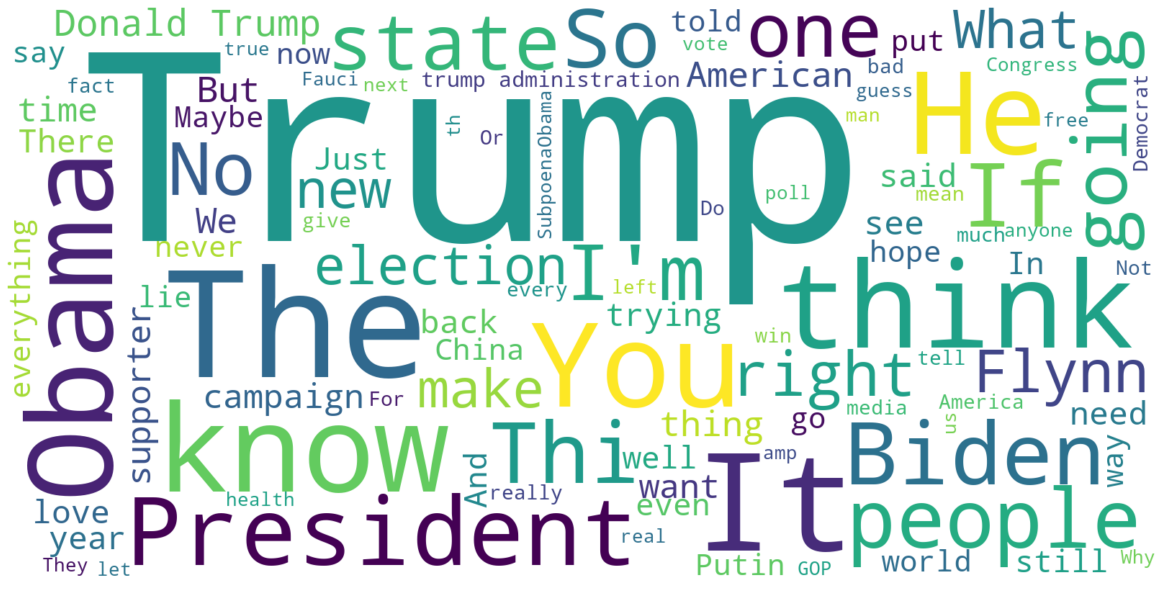

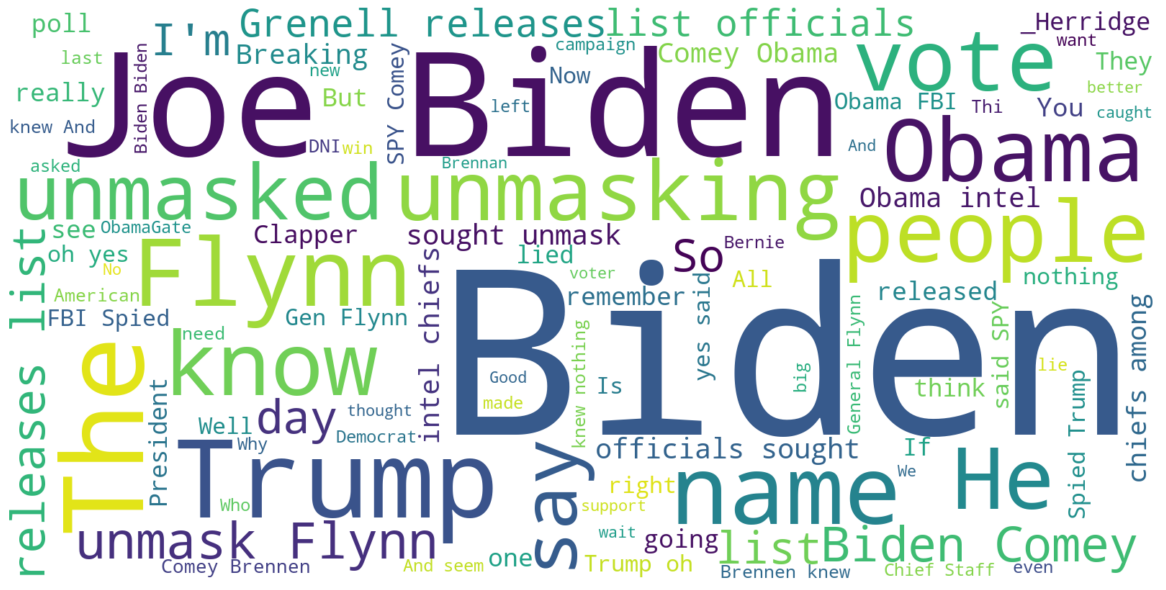

,Candidate,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
Trump,-0.2,0.0,-0.1,0.6,0.285714,0.6,0.4,0.000000,-0.50,-0.7,...,-0.125,0.0,0.207143,-0.4,0.0,0.400000,0.0,0.285714,0.0,-0.066667
Biden,0.1,-0.5,0.0,0.0,0.125000,-0.5,0.0,0.166667,0.25,0.0,...,0.000,0.0,0.000000,0.0,-0.1,-0.333333,0.0,0.000000,0.0,0.700000


In [4]:
sentiments = pd.DataFrame()
for i in range(len(candidates)):
    if i % 5 == 0:
        print("waiting")
        time.sleep((15 * 60) + 10)
        print("resuming")
    tweets = tweepy.Cursor(api.search, q=candidates[i] + " -filter:retweets -filter:links", lang="en", 
                           since="2019-03-01").items(500)
    polar = []
    rawtweets = []
    alltw = " "
    for tweet in tweets:
        a = clean_tweet(unidecode.unidecode(tweet.text))
        a = ' '.join([word for word in a.split() if word not in stopwords])
        text = TextBlob(a)
        polar.append(text.sentiment.polarity)
        alltw =  alltw + " " + a + " "
    sentiments = sentiments.append(pd.DataFrame(data=polar).T)
    wordcloud = WordCloud(width=1600, height=800, contour_color = "rgb", max_words = 100, background_color="white").generate(alltw)
    plt.figure(figsize = (16, 16), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 
    rawtweets = rawtweets.append(alltw)
    
sentiments = sentiments.rename(index = str, columns={0:"Candidate"})
sentiments.index = candidates
sentiments


In [5]:
sentiments = sentiments.fillna(0)
sentiments[sentiments != 0].transpose().describe()

,Trump,Biden
count,272.000000,206.00000
mean,0.027382,0.11405
std,0.394758,0.39586
min,-1.000000,-1.00000
25%,-0.214583,-0.10000
50%,0.100000,0.15000
75%,0.300000,0.35000
max,1.000000,1.00000


<ipython-input-6-ea46bb0277b2>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(op.index, height=op, color="rgby")


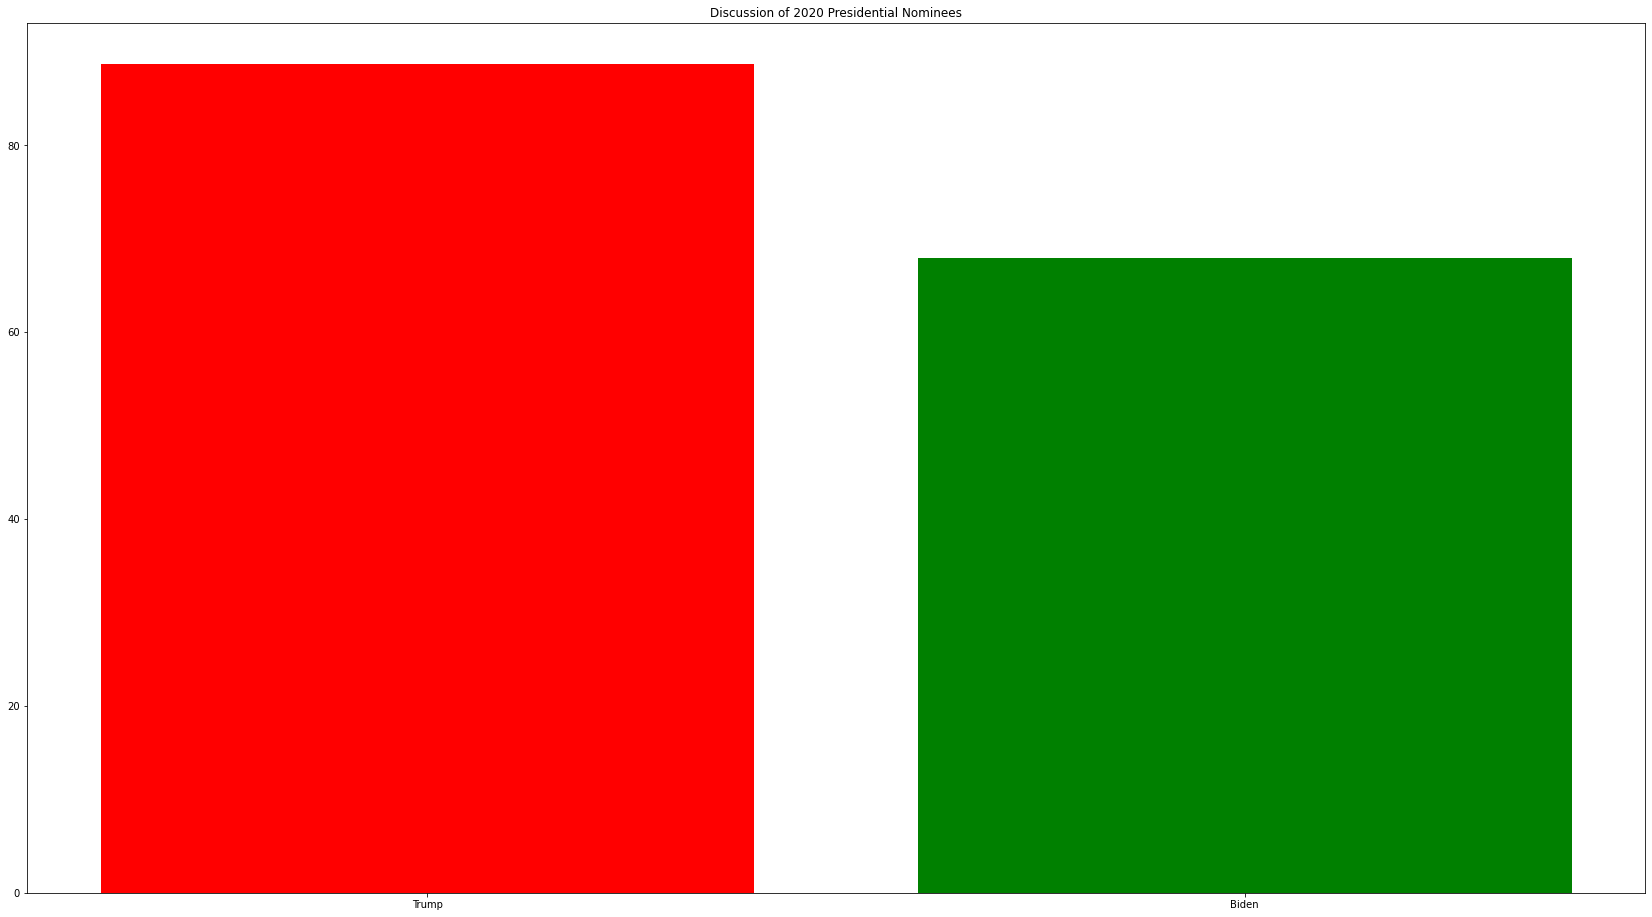

In [6]:
op = abs(sentiments[sentiments != 0].transpose()).sum()
plt.figure(figsize = (29, 16), facecolor = None) 
plt.bar(op.index, height=op, color="rgby")
plt.title("Discussion of 2020 Presidential Nominees")
plt.show()

<ipython-input-7-1eb2c77aab88>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(op.index, height=op, color="rgby")


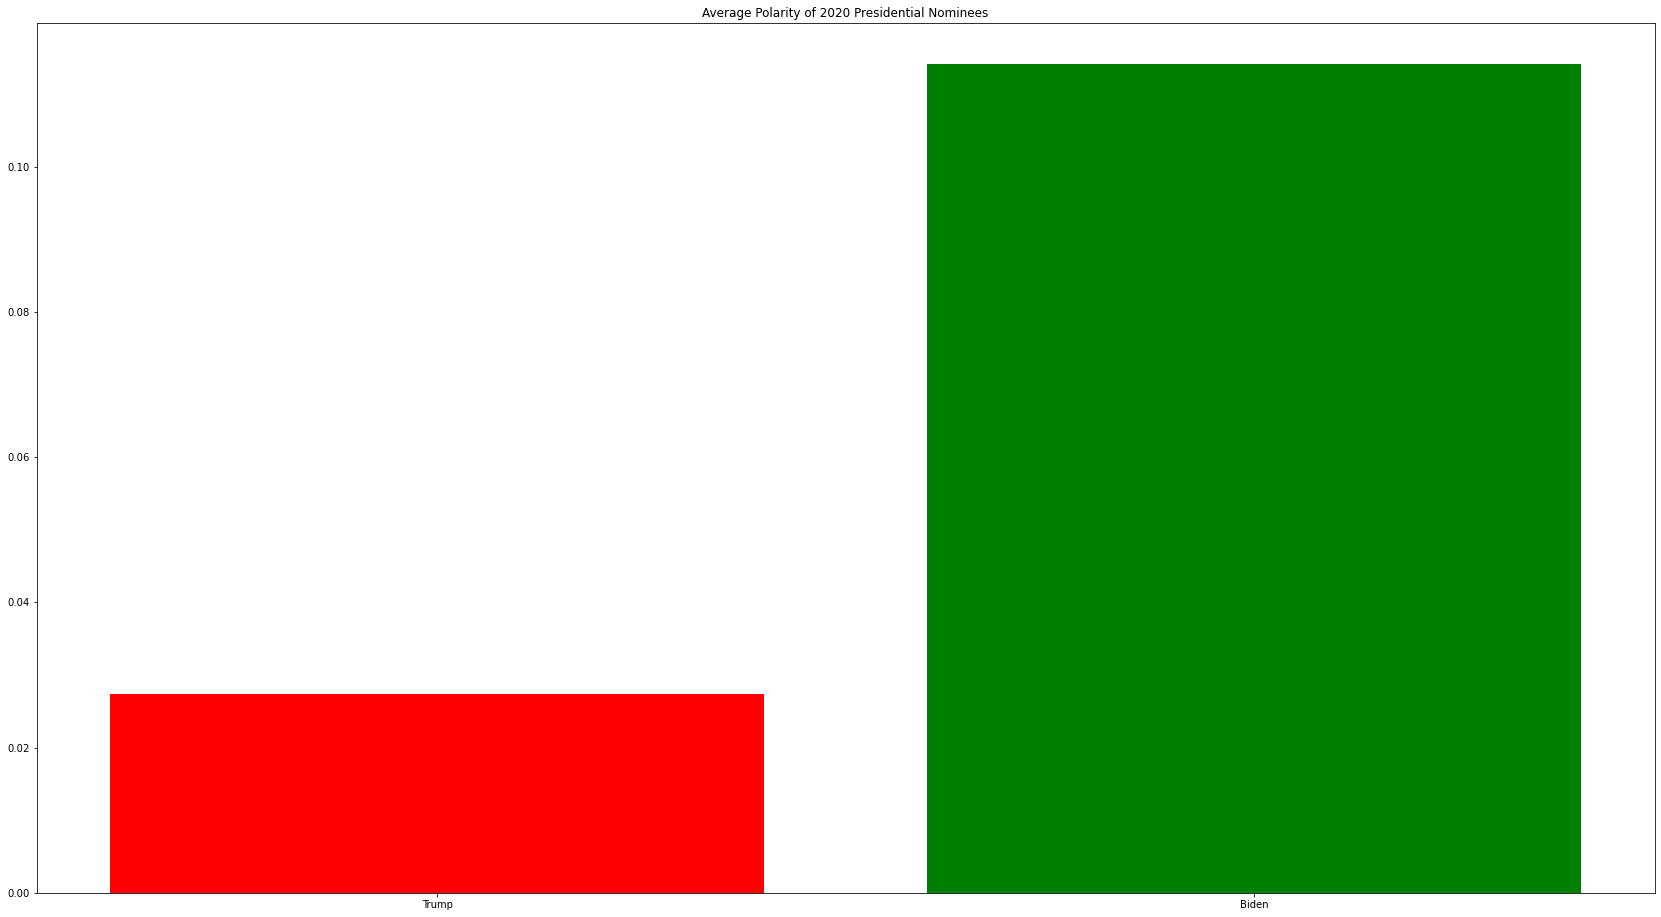

In [7]:
op = sentiments[sentiments != 0].transpose().mean()
plt.figure(figsize = (29, 16), facecolor = None) 
plt.bar(op.index, height=op, color="rgby")
plt.title("Average Polarity of 2020 Presidential Nominees")
plt.show()